In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree


# Decision Trees

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

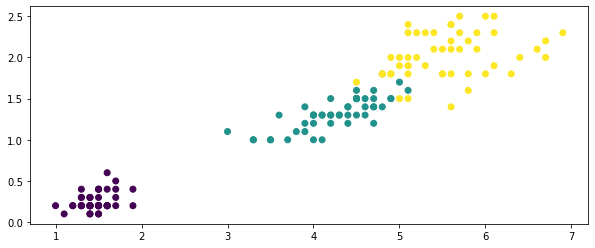

In [3]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
tree_clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Wizualizacja
Możesz wizualizować nauczone drzewo decyzyjne, najpierw używając metody **export_graphviz()**, aby stworzyć plik definicji wykresu o nazwie iris_tree.dot:

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="./iris_tree1.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Następnie możesz przekonwertować ten plik .dot na różne formaty, takie jak PDF lub PNG, za pomocą graphviz.

http://www.graphviz.org/

C:\Program Files (x86)\Graphviz2.38\bin

In [6]:
!dot -Tpng iris_tree1.dot -o iris_tree1.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


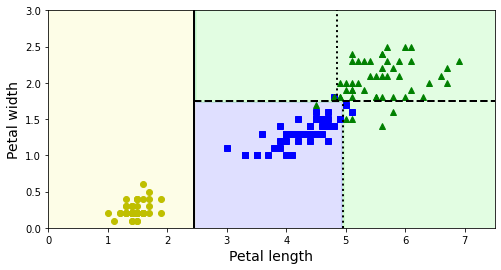

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [18]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [19]:
tree_clf.predict([[5, 1.5]])

array([2])

In [24]:
from mlxtend.plotting import plot_decision_regions

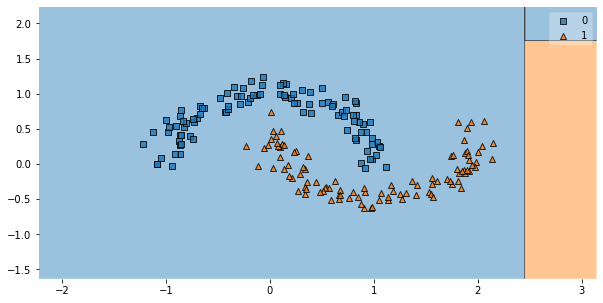

In [25]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad.

Naucz 

```pyrhon
DecisionTreeClassifier(max_depth=10, random_state=42)
```

* narysuj graf
* narysuj punkty oraz granice decyzyjne

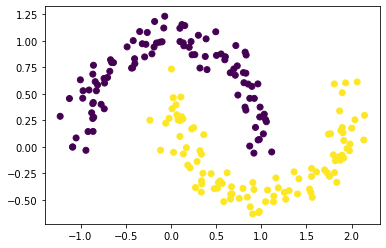

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

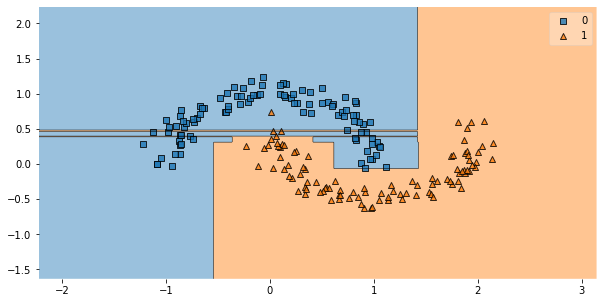

In [32]:
tree_clf_1 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf_1.fit(X, y)
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf_1)
plt.show()

In [22]:
!dot -Tpng moons_tree.dot -o moons_tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


[Text(156.9375, 205.35999999999999, 'X[1] <= 0.306\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(41.85, 181.2, 'X[0] <= -0.544\ngini = 0.288\nsamples = 109\nvalue = [19, 90]'),
 Text(20.925, 157.04, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(62.775000000000006, 157.04, 'X[1] <= -0.063\ngini = 0.18\nsamples = 100\nvalue = [10, 90]'),
 Text(41.85, 132.88, 'gini = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(83.7, 132.88, 'X[0] <= 0.618\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(62.775000000000006, 108.72, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(104.625, 108.72, 'X[0] <= 1.429\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(83.7, 84.56, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(125.55000000000001, 84.56, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(272.02500000000003, 181.2, 'X[0] <= 1.421\ngini = 0.196\nsamples = 91\nvalue = [81, 10]'),
 Text(251.10000000000002, 157.04, 'X[1] <= 0.48\ngini = 0.11\nsamples = 86\nvalue = [81, 

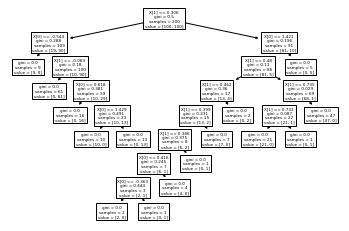

In [31]:
tree.plot_tree(tree_clf_1)

# Zad.

Porównaj wyniki z 

```python
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
```

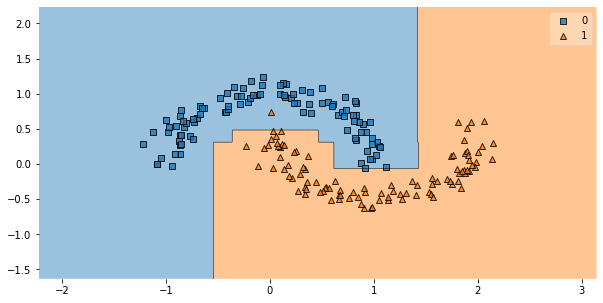

In [34]:
tree_clf_2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf_2.fit(X, y)
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf_2)
plt.show()

In [33]:
!dot -Tpng moons_tree2.dot -o moons_tree2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


[Text(146.475, 199.32, 'X[1] <= 0.306\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(41.85, 163.07999999999998, 'X[0] <= -0.544\ngini = 0.288\nsamples = 109\nvalue = [19, 90]'),
 Text(20.925, 126.83999999999999, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(62.775000000000006, 126.83999999999999, 'X[1] <= -0.063\ngini = 0.18\nsamples = 100\nvalue = [10, 90]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(83.7, 90.6, 'X[0] <= 0.618\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(62.775000000000006, 54.359999999999985, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(104.625, 54.359999999999985, 'X[0] <= 1.429\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(83.7, 18.119999999999976, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 1.421\ngini = 0.196\nsamples = 91\nvalue = [81, 10]'),
 Text(

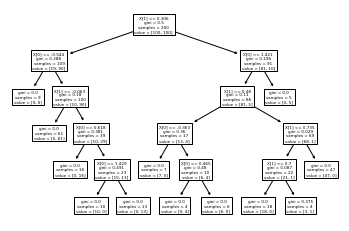

In [35]:
tree.plot_tree(tree_clf_2)

# Zad 

Dla obu wyników policz 

* precision
* recall
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc


tree clf 1

R^2: 1.0
recall_score: 0.9333333333333333
f1_score: 0.9655172413793104
accuracy_score: 0.9696969696969697
roc_score: 0.9666666666666667

tree clf 2

R^2: 1.0
recall_score: 0.9333333333333333
f1_score: 0.9655172413793104
accuracy_score: 0.9696969696969697
roc_score: 0.9666666666666667


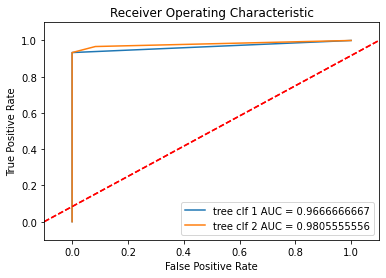

In [38]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import  metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    
models = dict()
models['tree clf 1'] = tree_clf_1
models['tree clf 2'] = tree_clf_2
 
for _, model in models.items():
    model.fit(X_train, y_train)
   
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models.items():
    print( '\n' + name + '\n')
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_score: {}".format( roc_auc_score(y_test, model.predict(X_test))))
   
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
 
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([-0.1, 1.1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()